In [56]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/medinaks/computer_vision.git
  os.chdir('/content')      
except Exception:
  pass

fatal: destination path 'computer_vision' already exists and is not an empty directory.


Read Write Image

In [58]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [81]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [83]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread('/content/computer_vision/images/daun_nangka/081.png')
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 4000 pixels
height: 3000  pixels
channels: 3


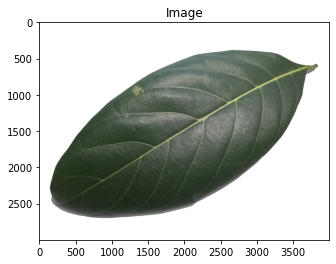

True

In [84]:
plt_imshow("Image", image)

cv2.imwrite("/content/new_image.jpg", image)

Rotation

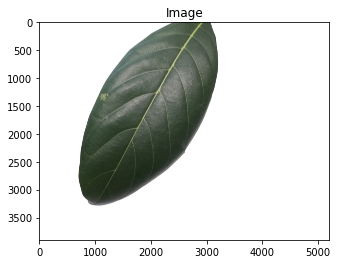

In [85]:

center = image.shape[1]/2, image.shape[0]/2
angle = 30
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image, M, (int(image.shape[1]*1.3), int(image.shape[0]*1.3)), borderValue=(255, 255, 255))
plt.figure()
plt_imshow("Rotated Image", rotated_image)

Resize

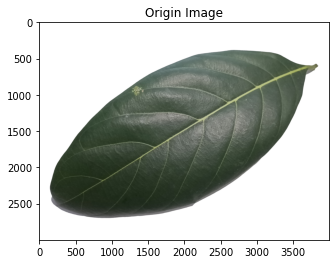

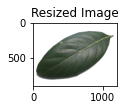

(900, 1200, 3)


In [87]:

width, height = int(image.shape[1]*0.3), int(image.shape[0]*0.3)
resized_image = cv2.resize(image, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)
plt_imshow("Origin Image", image)
plt.figure(figsize = (1.5, 1.5))
plt_imshow("Resized Image", resized_image)
print(resized_image.shape)


Flipping

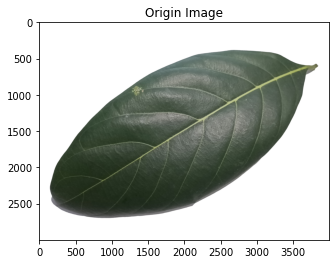

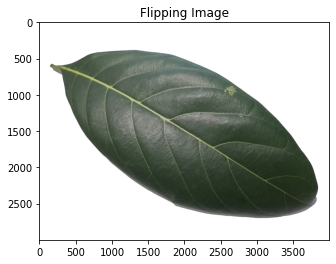

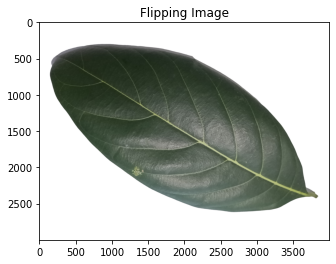

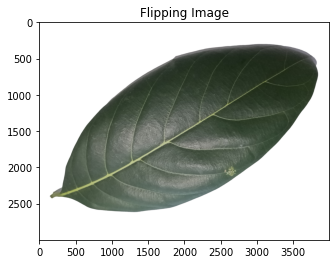

In [92]:

plt_imshow("Origin Image", image)
plt_imshow("Flipping Image", image[:, ::-1, :])
plt_imshow("Flipping Image", image[::-1, :, :])
plt_imshow("Flipping Image", image[::-1, ::-1, :])


Cropping

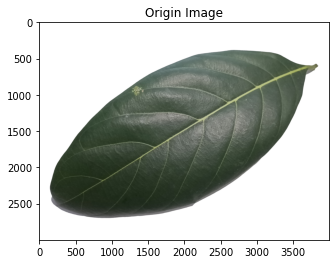

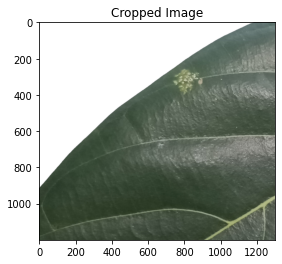

In [93]:
patch = (1300, 1200)
center = (1190, 1220)
cropped_image = cv2.getRectSubPix(image, patch, center)
plt_imshow("Origin Image", image)
plt_imshow("Cropped Image", cropped_image)
plt.show()

Masking

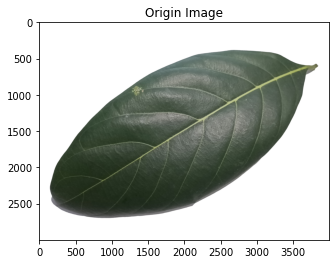

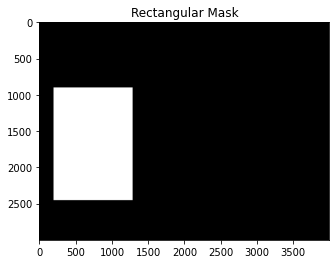

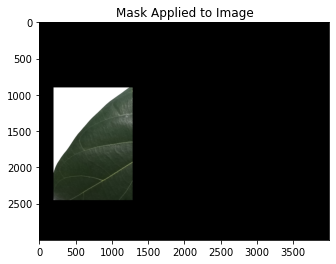

In [100]:
plt_imshow("Origin Image", image)


# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (200, 900), (1290, 2450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

Splitting and merging channel

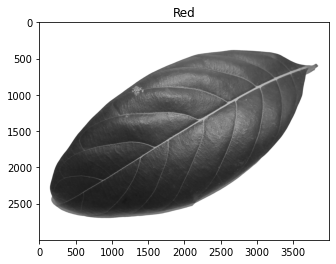

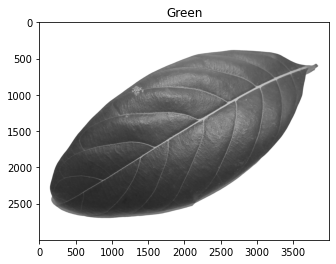

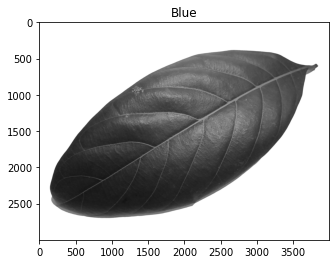

In [102]:
# load the input image and grab each channel -- note how OpenCV
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green Blue
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

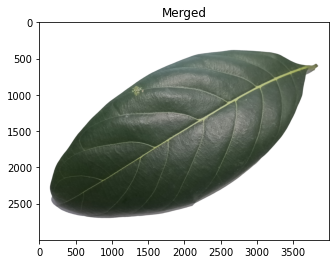

In [103]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

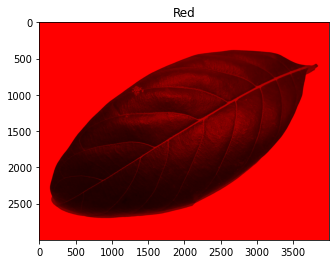

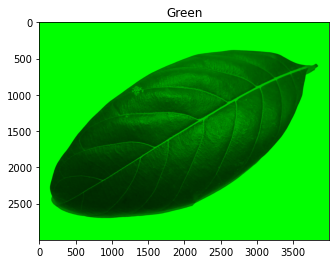

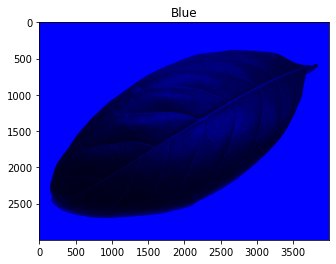

In [104]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))